# Data Management

## Setup

In [1]:
# Import modules
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


In [2]:
# Load data
df = pd.read_excel('/Users/julienmbarki/Documents/Doctorat/Publications/Article 2/Data/Code/data_requests/df_equal.xlsx')

# Group by playlist name
groups = df.groupby('playlist_name')


## PCA dimensionnality reduction

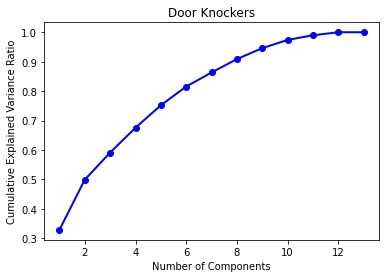

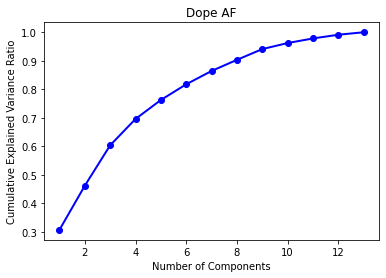

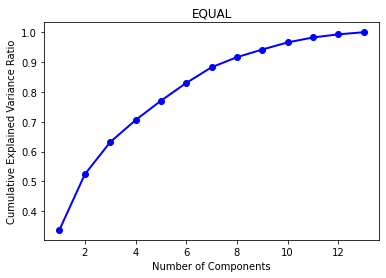

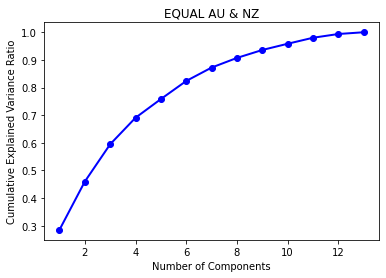

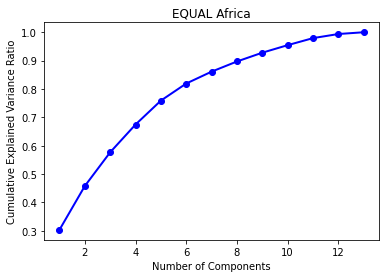

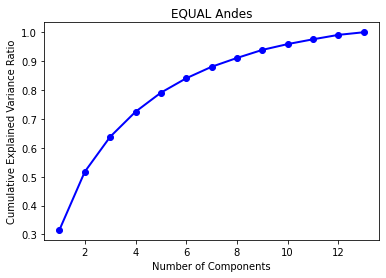

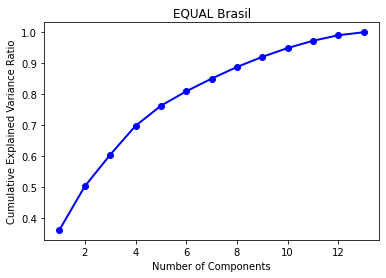

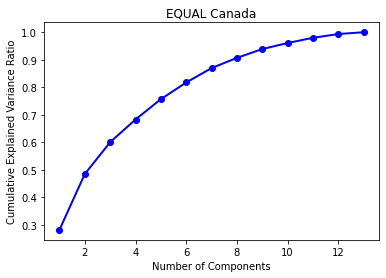

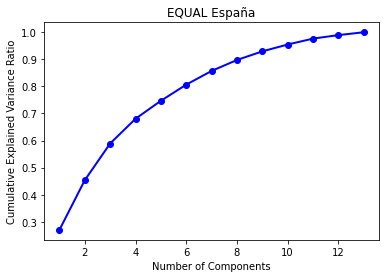

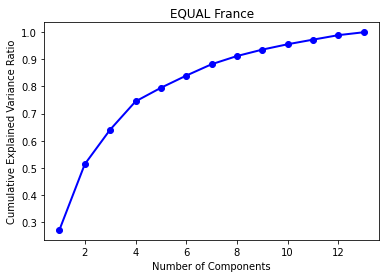

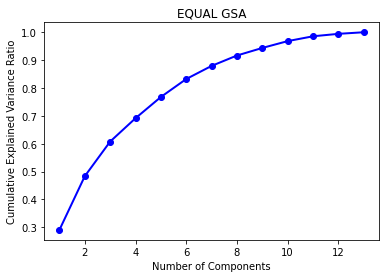

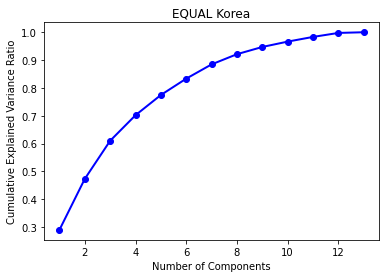

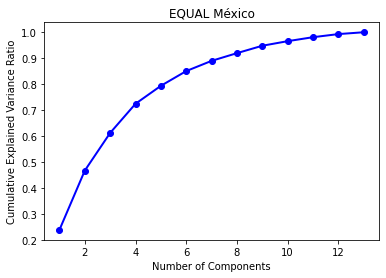

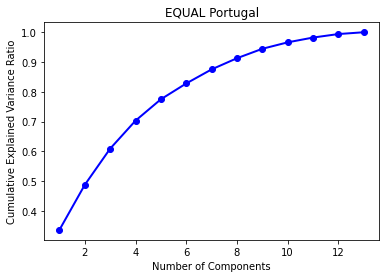

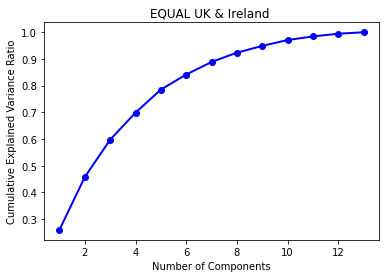

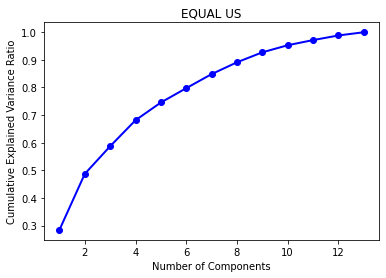

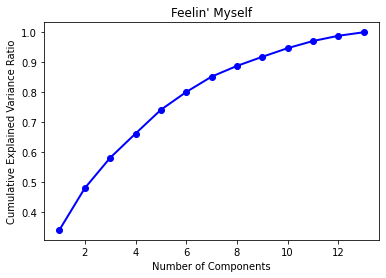

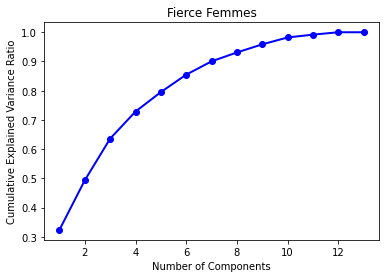

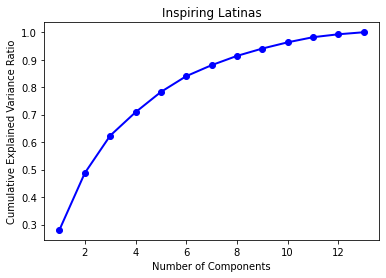

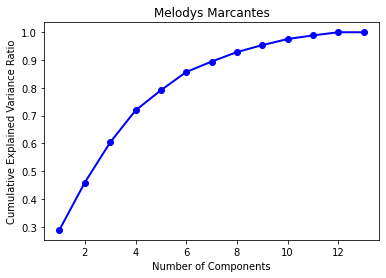

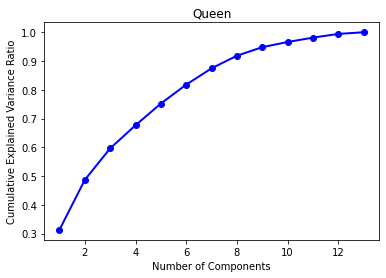

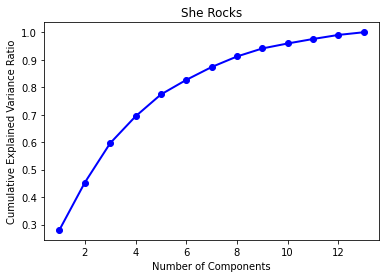

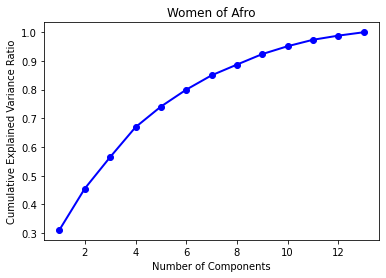

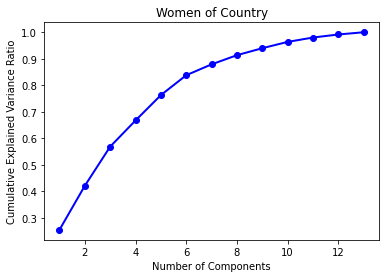

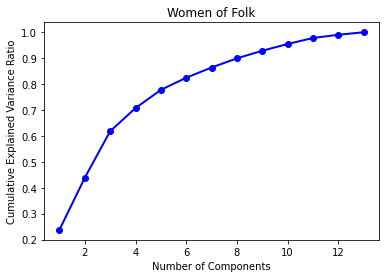

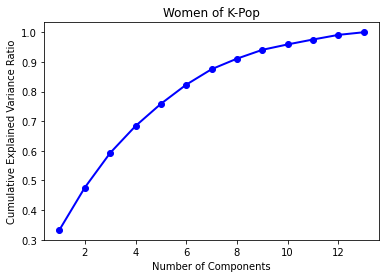

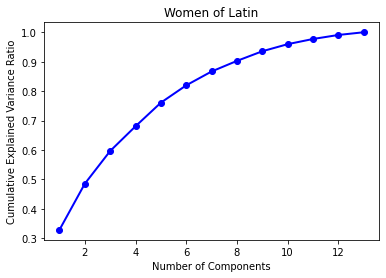

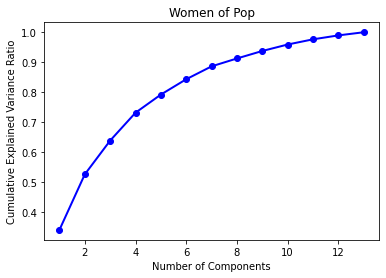

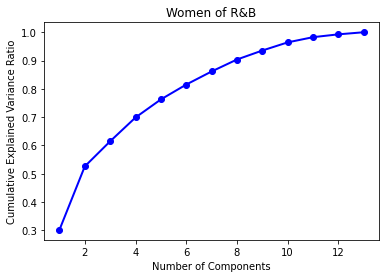

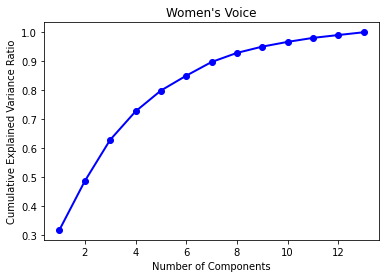

Most modal value of optimal components: 6


In [3]:
# Select the number of components
scaler = MinMaxScaler()

optimal_num_components = []

for group_name, group in groups:
    # Subset and scale
    subset = group.loc[:, "danceability":"time_signature"]
    scaled_columns = scaler.fit_transform(subset)

    # Apply PCA
    pca = PCA()
    pca.fit(scaled_columns)
    
    # Calculate cumulative explained variance
    cumulative_variance = pca.explained_variance_ratio_.cumsum()
    optimal_components = next(i for i, var in enumerate(cumulative_variance) if var >= 0.8) + 1
    optimal_num_components.append(optimal_components)

    # Plot scree plot
    plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, 'bo-', linewidth=2)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title(group_name)
    plt.show()

# Calculate the most modal value
most_common_optimal = Counter(optimal_num_components).most_common(1)
most_modal_value = most_common_optimal[0][0]

print("Most modal value of optimal components:", most_modal_value)


In [4]:
# Apply PCA to reduce dimensionality
# Loop over each group and apply PCA with optimal number of components
scaler = MinMaxScaler()

reduced_data_dict = {}

for group_name, group in groups:
    # Subset data
    subset = group.loc[:, "danceability":"time_signature"]

    # Scale the specified columns
    scaled_columns = scaler.fit_transform(subset)

    # Apply PCA with the optimal number of components
    n_components = 6
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(scaled_columns)
    reduced_data_dict[group_name] = reduced_data


## Clustering

### Elbow method

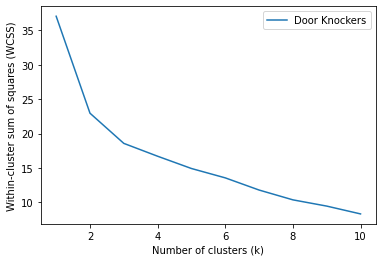

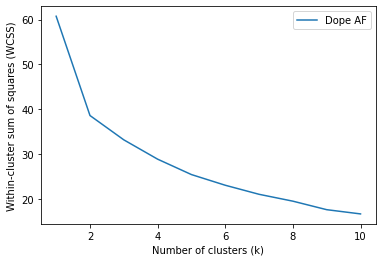

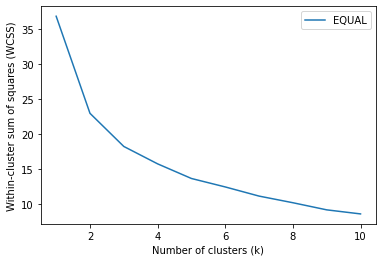

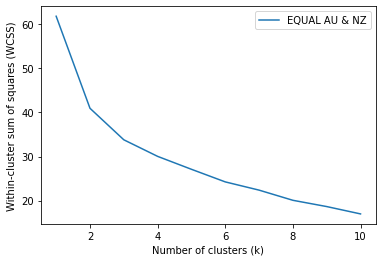

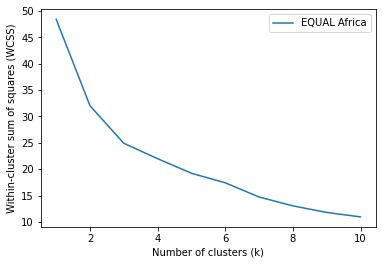

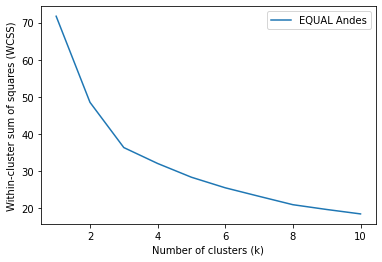

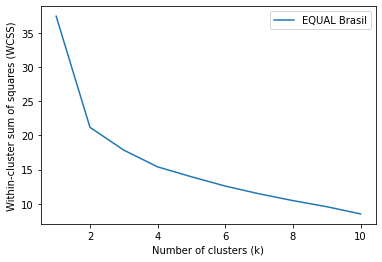

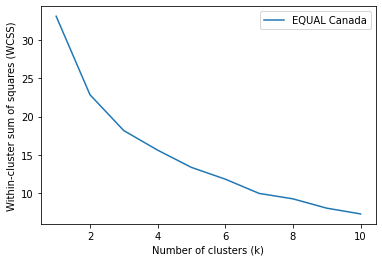

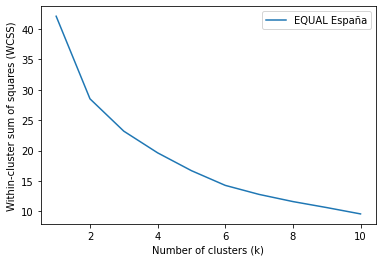

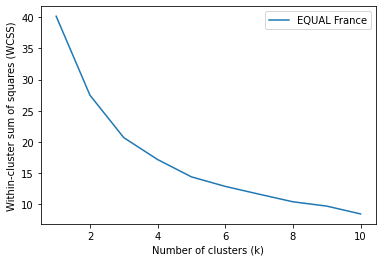

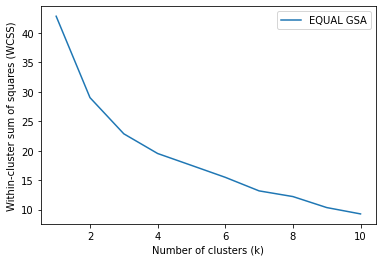

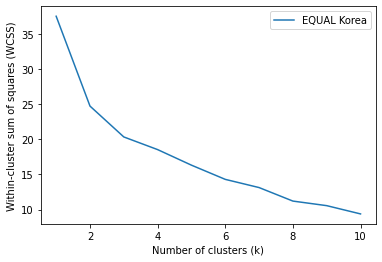

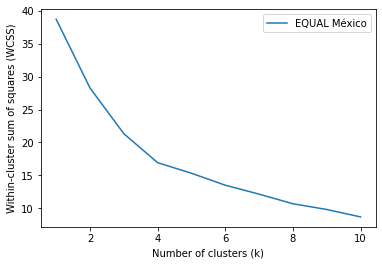

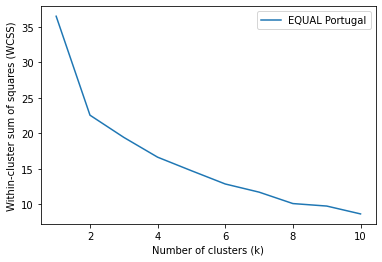

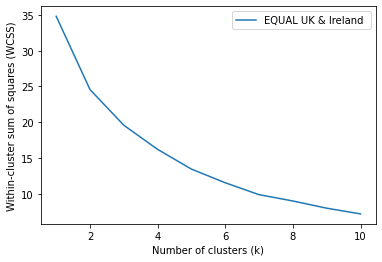

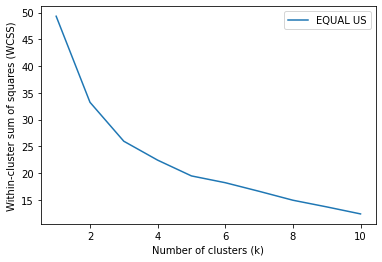

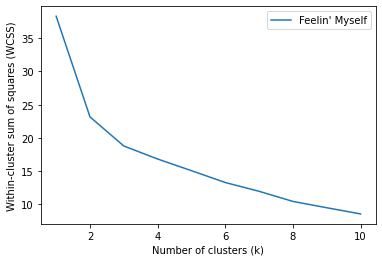

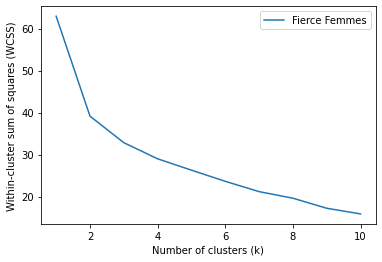

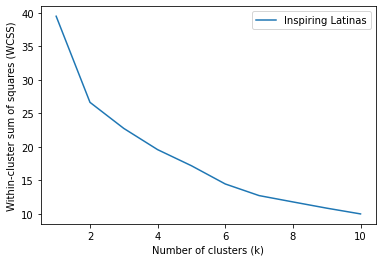

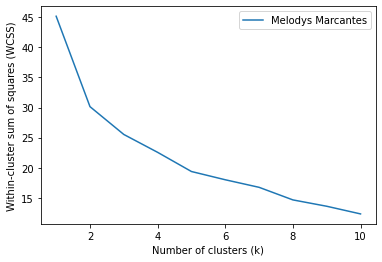

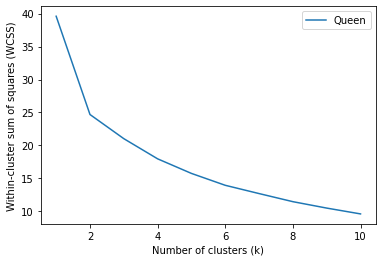

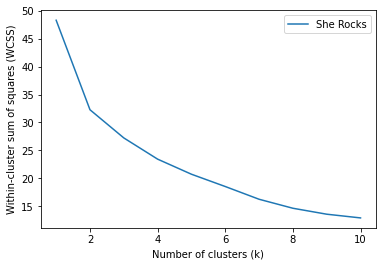

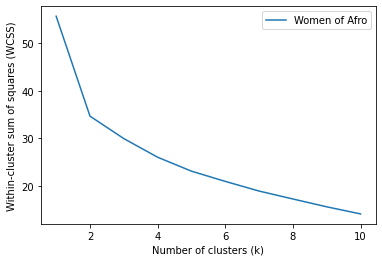

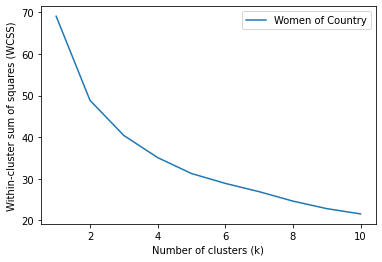

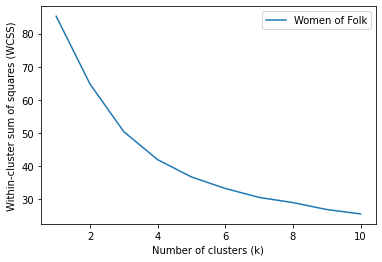

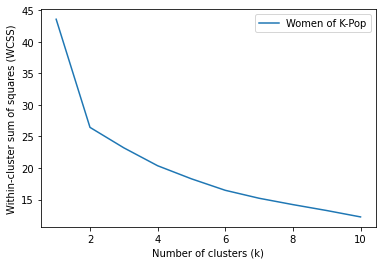

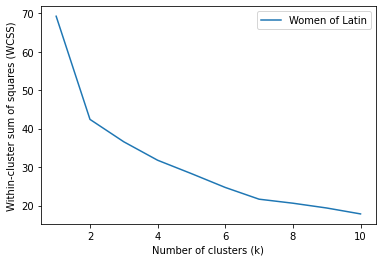

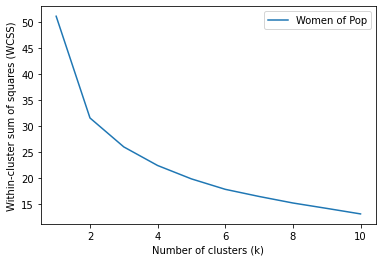

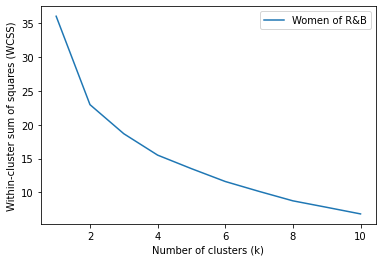

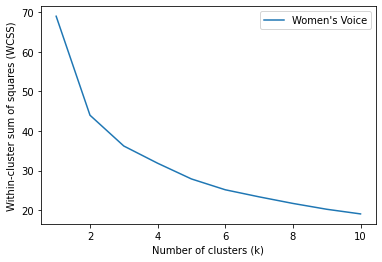

In [5]:
# Apply the elbow method to determine the optimal number of clusters
# Calculate the elbow
wcss = {}

for k in range(1, 11):
  for group_name, group in groups:
    reduced_data = reduced_data_dict[group_name]
    
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_data)
    
    if group_name not in wcss:
      wcss[group_name] = []

    wcss[group_name].append(kmeans.inertia_)

# Plot the elbow
for group_name, values in wcss.items():
  plt.plot(range(1, 11), values, label=group_name)
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Within-cluster sum of squares (WCSS)')
  plt.legend()
  plt.show()


### Gap statistic method

In [6]:
# Set random seeds
random.seed(42)
np.random.seed(42)


In [7]:
# Define a function to compute the gap statistic
def compute_gap(data, k):
  # Compute the WCSS for the real data
  kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
  wcss = kmeans.inertia_

  # Compute the null reference distribution by shuffling the data and
  # re-assigning it to clusters
  n_samples, n_features = data.shape
  wcss_null = []

  for _ in range(20):
    data_shuffled = np.random.permutation(data)
    wcss_null.append(KMeans(n_clusters=k).fit(data_shuffled).inertia_)
  
  wcss_null = np.array(wcss_null)
  
  # Compute the gap statistic and gap*
  gap = np.mean(np.log(wcss_null)) - np.log(wcss)

  # Compute the standard deviation of the null reference distribution
  gap_std = np.std(np.log(wcss_null))

  return gap, gap_std


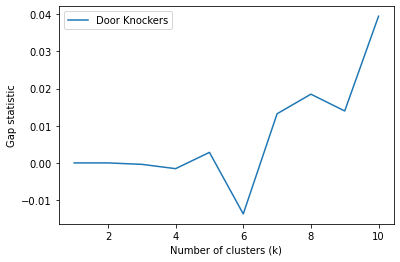

Group: Door Knockers, Optimal k (gap): 2, Optimal k (gap*): 10


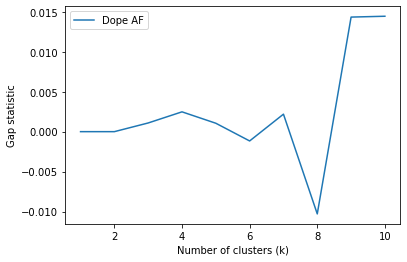

Group: Dope AF, Optimal k (gap): 3, Optimal k (gap*): 10


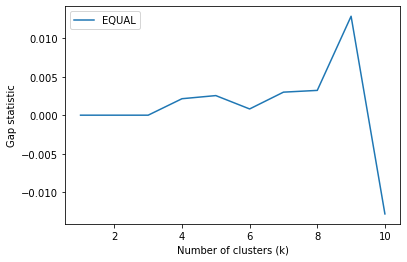

Group: EQUAL, Optimal k (gap): 4, Optimal k (gap*): 9


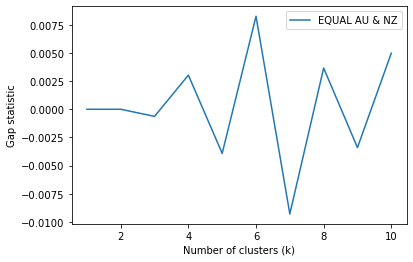

Group: EQUAL AU & NZ, Optimal k (gap): 2, Optimal k (gap*): 6


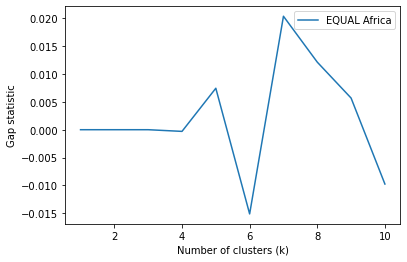

Group: EQUAL Africa, Optimal k (gap): 3, Optimal k (gap*): 7


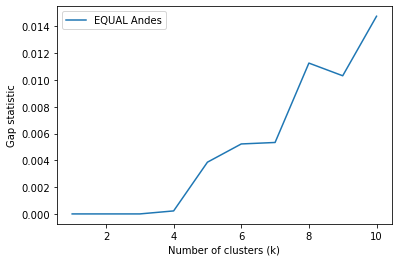

Group: EQUAL Andes, Optimal k (gap): 5, Optimal k (gap*): 10


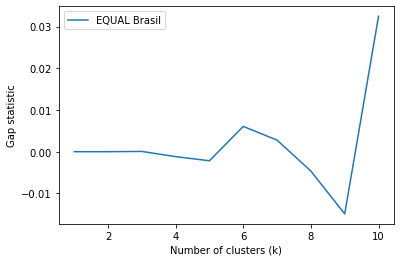

Group: EQUAL Brasil, Optimal k (gap): 3, Optimal k (gap*): 10


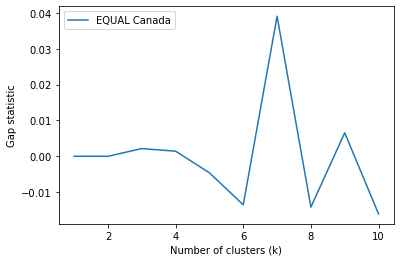

Group: EQUAL Canada, Optimal k (gap): 3, Optimal k (gap*): 7


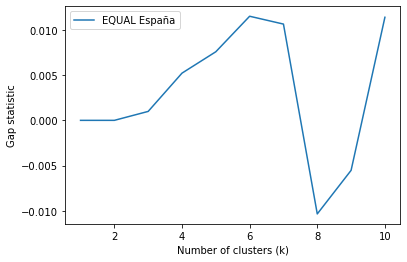

Group: EQUAL España, Optimal k (gap): 4, Optimal k (gap*): 6


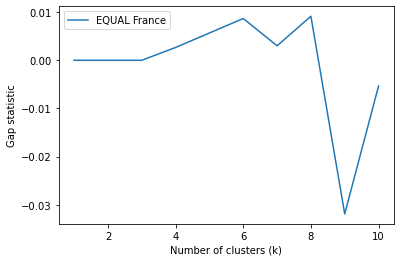

Group: EQUAL France, Optimal k (gap): 2, Optimal k (gap*): 8


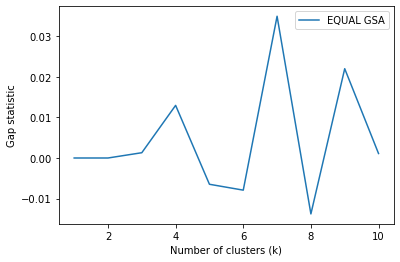

Group: EQUAL GSA, Optimal k (gap): 4, Optimal k (gap*): 7


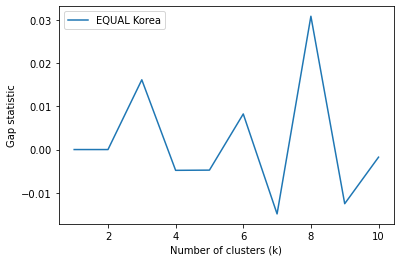

Group: EQUAL Korea, Optimal k (gap): 3, Optimal k (gap*): 8


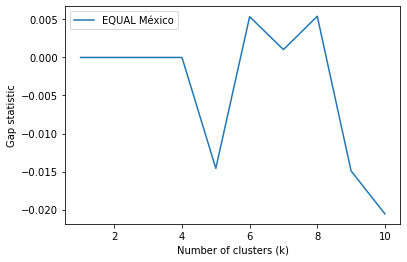

Group: EQUAL México, Optimal k (gap): 2, Optimal k (gap*): 8


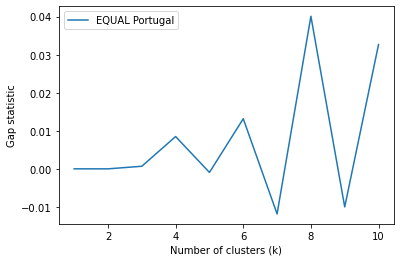

Group: EQUAL Portugal, Optimal k (gap): 4, Optimal k (gap*): 8


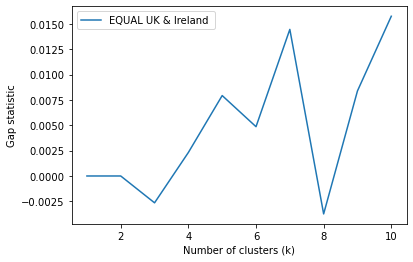

Group: EQUAL UK & Ireland , Optimal k (gap): 2, Optimal k (gap*): 10


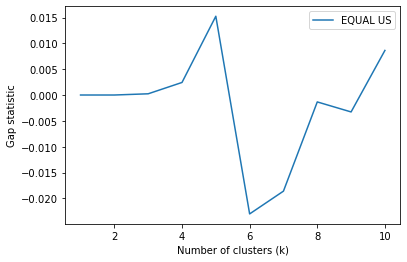

Group: EQUAL US, Optimal k (gap): 5, Optimal k (gap*): 5


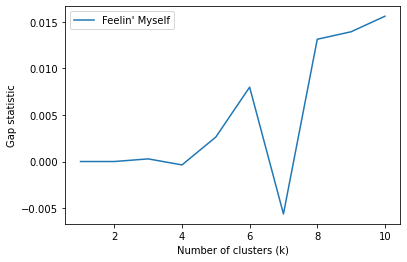

Group: Feelin' Myself, Optimal k (gap): 3, Optimal k (gap*): 10


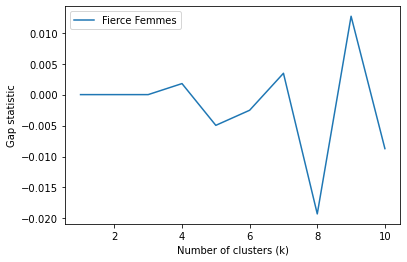

Group: Fierce Femmes, Optimal k (gap): 4, Optimal k (gap*): 9


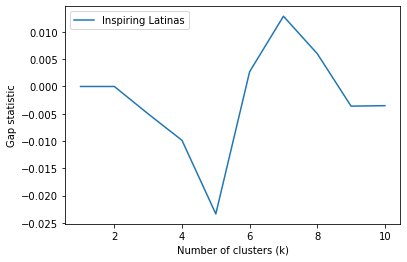

Group: Inspiring Latinas, Optimal k (gap): 2, Optimal k (gap*): 7


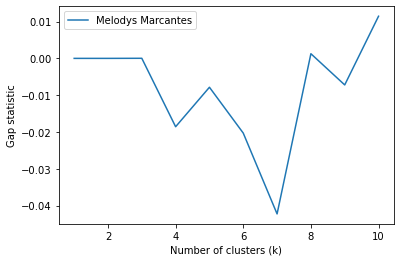

Group: Melodys Marcantes, Optimal k (gap): 3, Optimal k (gap*): 10


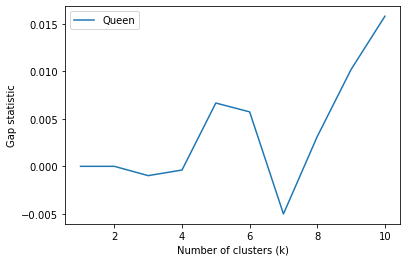

Group: Queen, Optimal k (gap): 2, Optimal k (gap*): 10


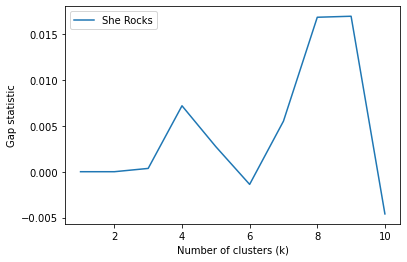

Group: She Rocks, Optimal k (gap): 4, Optimal k (gap*): 9


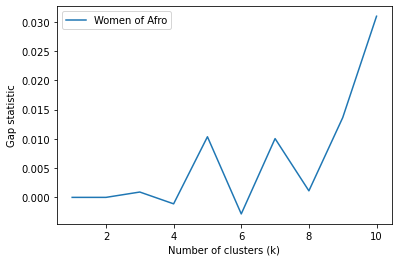

Group: Women of Afro, Optimal k (gap): 3, Optimal k (gap*): 10


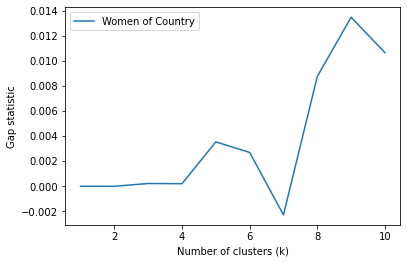

Group: Women of Country, Optimal k (gap): 3, Optimal k (gap*): 9


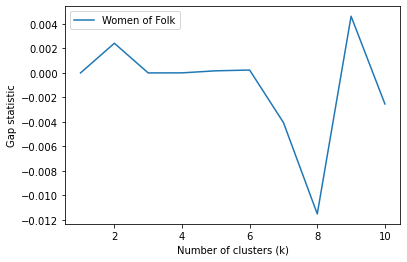

Group: Women of Folk, Optimal k (gap): 2, Optimal k (gap*): 9


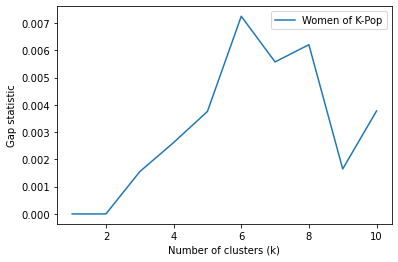

Group: Women of K-Pop, Optimal k (gap): 3, Optimal k (gap*): 6


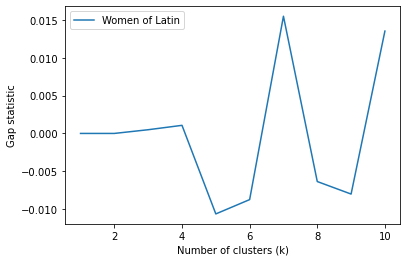

Group: Women of Latin, Optimal k (gap): 3, Optimal k (gap*): 7


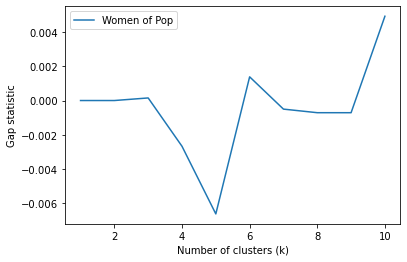

Group: Women of Pop, Optimal k (gap): 3, Optimal k (gap*): 10


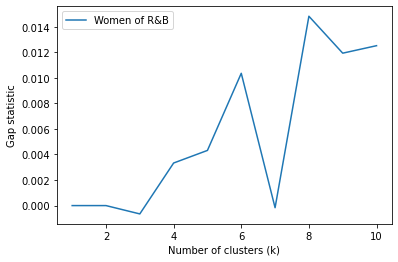

Group: Women of R&B, Optimal k (gap): 2, Optimal k (gap*): 8


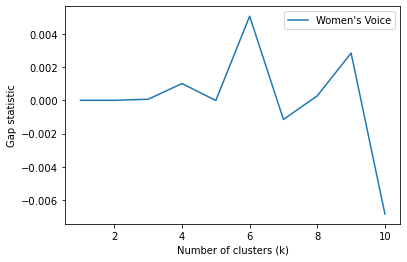

Group: Women's Voice, Optimal k (gap): 4, Optimal k (gap*): 6


In [8]:
# Calculate the optimal k
# Loop over each group and generate scree plot
optimal_num_k = {}
optimal_num_k_2 = {}

for group_name, group in groups:
    group_gaps = []
    group_errors = []

    for k in range(1, 11):
        reduced_data = reduced_data_dict[group_name]

        # Compute the gap statistic and standard deviation for the current value of k
        gap, gap_std = compute_gap(reduced_data, k)
        group_gaps.append(gap)
        group_errors.append(gap_std)

    # Find the optimal number of components based on the gap statistic criterion
    optimal_k = None
    for i in range(1, len(group_gaps) - 1):
        s_k = group_errors[i]
        threshold = s_k * np.sqrt(1 + 1 / 20)
        if group_gaps[i] >= group_gaps[i + 1] - threshold:
            optimal_k = i + 1
            break

    if optimal_k is None:
        optimal_k = np.argmax(group_gaps) + 1

    optimal_num_k[group_name] = optimal_k

    # Find the optimal number of components based on the gap* statistic criterion
    for i in range(1, len(group_gaps)):
        optimal_k_2 = np.argmax(group_gaps) + 1

    optimal_num_k_2[group_name] = optimal_k_2

    # Plot the gap statistics
    plt.plot(range(1, 11), group_gaps, label=group_name)

    # Set labels and display the plot
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Gap statistic')
    plt.legend()
    plt.show()

    print(f"Group: {group_name}, Optimal k (gap): {optimal_num_k[group_name]}, Optimal k (gap*): {optimal_num_k_2[group_name]}")


### Apply KMeans

Group Door Knockers: [1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 1]


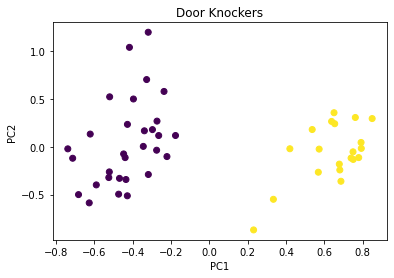

Group Dope AF: [1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 2 1 1 0 1 2 2 1 2 2
 1 1 0 1 1 2 0 1 0 0 1 1 2 1 0 0 2 0 0 2 2 0 0 0 2 0 0 1 1 1 0 2 0 1 0 0 0
 1 0 0 1 0 2 2 0 1 0 2 1 0 1 1 2]


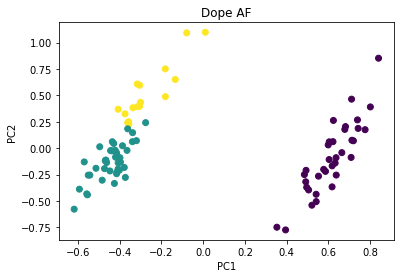

Group EQUAL: [1 2 0 3 2 2 1 1 2 1 0 0 0 1 0 1 2 1 1 2 0 1 1 1 0 3 3 2 1 3 0 1 2 0 1 0 0
 3 1 1 1 2 0 1 3 2 1 1 3 2]


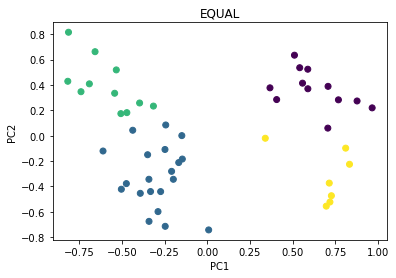

Group EQUAL AU & NZ: [0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0]


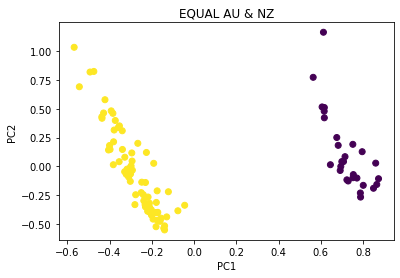

Group EQUAL Africa: [2 1 1 2 1 0 1 1 0 2 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 2 0 1 2 1 1 1 1 1 0 1
 0 0 2 0 1 0 0 1 0 0 0 1 0 1 2 2 0 1 0 0 1 2 1]


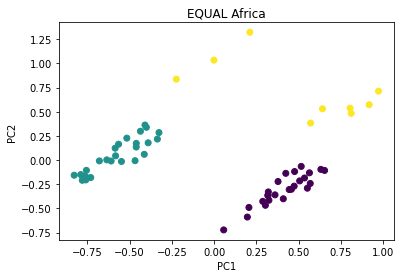

Group EQUAL Andes: [4 3 0 2 3 4 1 4 1 4 1 0 2 2 1 0 0 1 4 2 4 0 0 2 2 0 0 0 2 1 2 1 2 1 0 1 2
 1 3 2 4 4 0 1 4 2 2 2 2 1 1 1 4 2 0 1 0 3 4 0 0 3 4 0 1 0 0 1 4 0 3 1 1 2
 2 4 1 4 0 4 0 4 1 4 0 0 3 1 1 4 2 2 0 0 2 2 1 4 4 3]


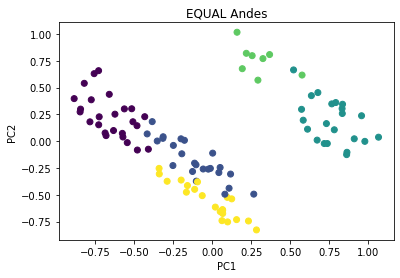

Group EQUAL Brasil: [0 1 2 2 2 2 0 2 2 1 0 0 0 2 1 2 1 1 1 2 1 1 1 0 2 2 1 2 0 1 2 1 0 1 2 0 1
 2 1 1 2 0 1 1 1 2 1 1 1 1 0 2 1 1 1 2 2 0 1]


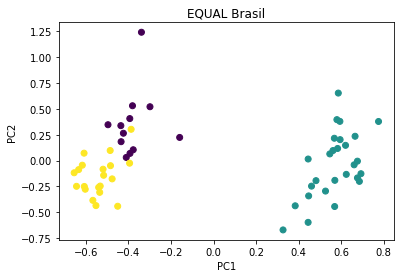

Group EQUAL Canada: [0 1 0 2 2 0 1 0 2 2 1 2 1 1 0 1 0 2 0 0 0 2 1 0 1 0 1 1 1 0 0 0 1 0 1 2 2
 1 1 1]


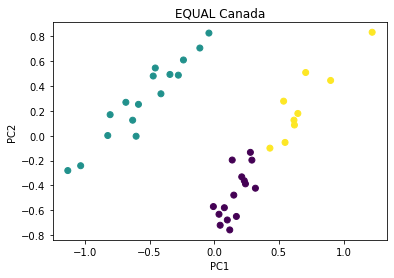

Group EQUAL España: [0 1 0 2 0 1 1 1 3 1 2 1 0 1 1 2 1 1 2 1 0 1 1 1 3 1 1 0 0 1 1 0 1 0 0 3 1
 3 1 1 1 1 1 0 0 3 0 1 0 0 0 2 1 0 2 1 1 0 0]


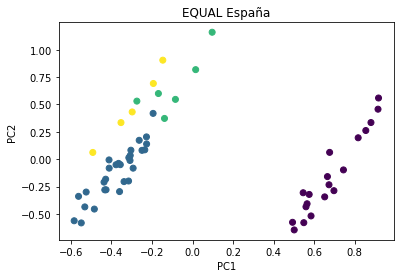

Group EQUAL France: [0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 0 0 1 0]


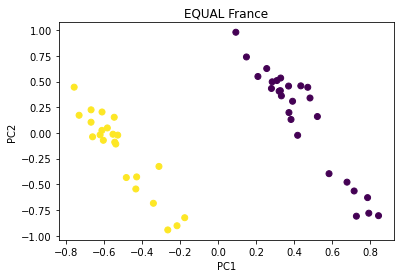

Group EQUAL GSA: [3 3 3 1 1 1 1 1 0 2 1 2 1 1 0 0 0 0 0 0 1 1 0 2 0 0 1 3 1 2 1 0 2 1 0 1 2
 0 2 3 1 0 1 0 1 1 0 1 1 1]


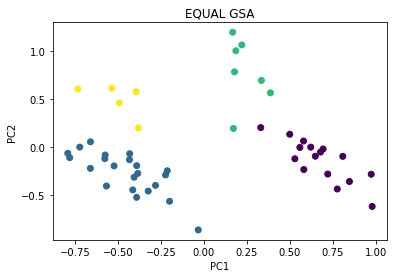

Group EQUAL Korea: [1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 2 2 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 0 1 0 2 0 0 2 0]


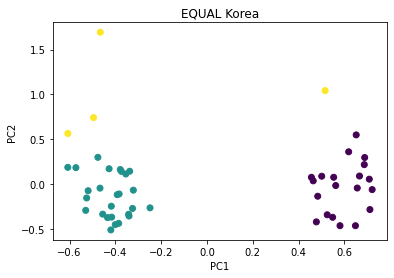

Group EQUAL México: [1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0
 1 0 0]


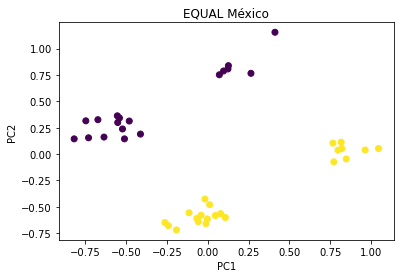

Group EQUAL Portugal: [1 2 1 2 3 2 0 1 1 1 1 3 1 3 0 2 3 3 0 3 1 2 0 1 2 3 0 2 2 2 3 2 0 2 2 3 1
 1 3 0 1 1 3 1 1 0 0 3 1 0]


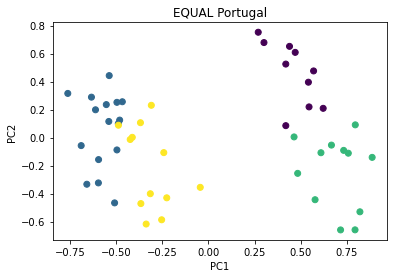

Group EQUAL UK & Ireland : [1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 0 0]


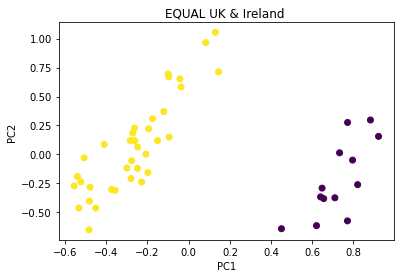

Group EQUAL US: [2 3 2 2 4 4 2 2 2 2 3 1 2 2 0 4 4 1 3 3 3 0 0 2 2 4 1 3 3 4 3 2 2 0 2 4 3
 4 3 1 1 3 3 1 1 3 3 4 3 4 4 1 4 2 2 1 2 4 2 2 4 4 0 3 3 3 3 1 0 3 3 4]


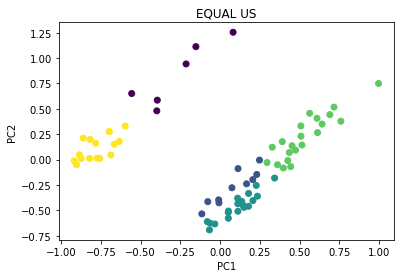

Group Feelin' Myself: [2 2 0 0 1 1 2 1 0 1 0 1 2 1 0 2 1 1 0 1 2 1 1 1 2 1 2 2 2 2 1 1 0 1 2 2 1
 2 2 2 1 1 2 1 2 1 1 2 1 2]


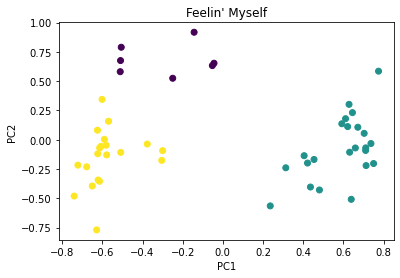

Group Fierce Femmes: [0 1 1 3 0 1 2 1 1 0 0 3 2 3 0 0 2 2 2 3 2 1 1 2 0 3 3 1 2 1 0 2 1 2 0 0 3
 0 3 2 0 2 0 1 0 3 2 2 2 1 1 0 3 3 2 0 2 2 2 0 0 3 3 0 0 2 1 0 3 0 1 0 0 0
 2 2 1 2 3 0 2 0 3 1 2 2 0 2 1 2 2 2 0 3 2 1 1 2 3 0]


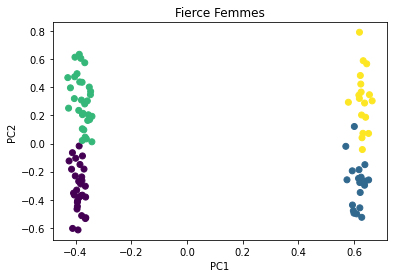

Group Inspiring Latinas: [1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 1 1 1 1 1 0 0]


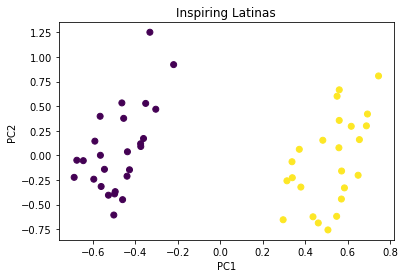

Group Melodys Marcantes: [2 0 2 2 2 2 2 1 0 2 0 1 2 0 1 2 0 2 2 1 0 0 2 2 1 1 2 2 0 2 2 1 2 2 0 0 2
 0 1 0 1 0 1 0 2 0 2 1 1 1 1 1 0 2 0 2 1 2 1 1]


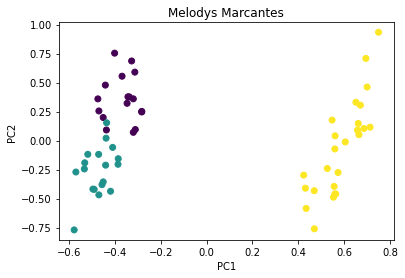

Group Queen: [0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0]


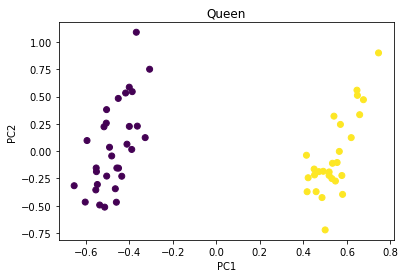

Group She Rocks: [1 0 3 3 0 2 3 3 3 0 0 3 2 3 0 2 3 2 3 1 2 0 0 3 3 3 3 2 2 3 0 2 2 3 1 0 0
 3 2 0 0 2 1 0 3 2 0 2 0 2 0 3 0 0 2 0 0 3 2 0 3 1 1 1 3 3 0 2 2 2 2 2 3 2
 3]


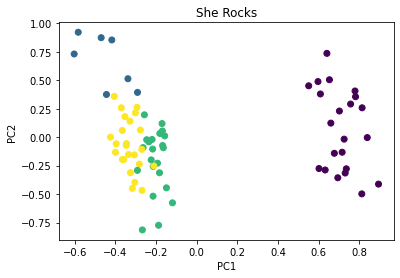

Group Women of Afro: [1 0 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 2 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 2 2 2 0 0 2 2 2 2 2 0 2 1 0 0 1 2 0 2 0 2 1 1 2 2 2 0 1 0 1 0 1 0 0
 2 2 2 1 1 2]


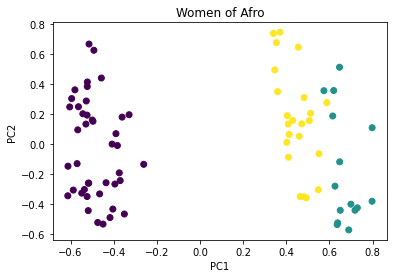

Group Women of Country: [1 0 2 0 2 0 0 2 2 0 1 2 0 0 2 0 0 2 2 2 0 0 2 0 1 2 2 1 2 2 2 0 0 2 2 2 1
 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 1 0 2 0 2 0 1 0 1 2 0 0 0 1
 2 0 0 2 0 2 0 2 0 1 0 1 1 0 1 0 2 2 2 1 0 1 2 0 2 0 2 2 0 1 1 0 2 2 1 1 2
 0 0 0 2 1 0 1 0 2 0 1 2 0 0 1 2 0 1 2]


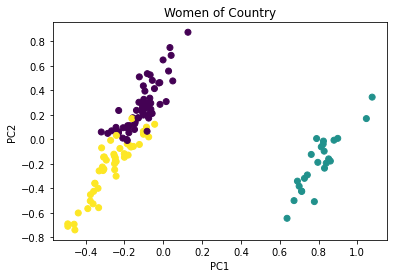

Group Women of Folk: [1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1]


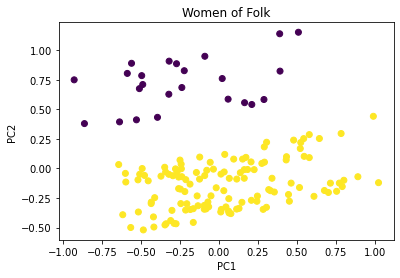

Group Women of K-Pop: [1 2 0 0 2 0 1 1 1 1 1 0 1 0 0 2 0 1 0 0 1 2 1 0 1 2 0 1 1 1 1 1 0 0 1 1 2
 2 1 1 0 2 2 0 0 1 1 2 2 2 1 2 0 1 1 1 1 1 2 1 1 1 2 1]


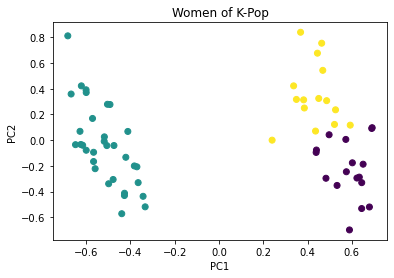

Group Women of Latin: [2 1 0 2 0 0 0 0 0 1 2 1 0 0 1 2 0 1 0 2 1 1 0 1 2 0 0 0 2 2 1 2 0 1 0 2 0
 0 0 1 0 0 0 0 0 2 0 1 0 0 0 0 2 0 2 1 2 1 0 1 0 1 1 1 0 0 2 1 0 0 0 1 0 2
 1 2 2 0 0 2 0 1 0 0 2 1 0 0 0 2 0 0 1 2 0 0 0 1 0 1]


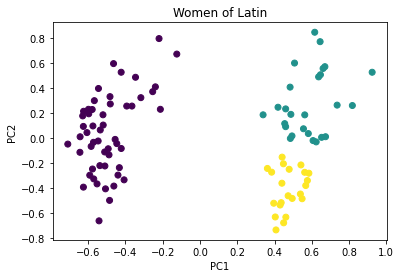

Group Women of Pop: [2 1 0 2 2 2 0 0 2 0 1 2 2 1 0 1 0 0 1 1 2 2 1 0 1 1 1 0 2 2 2 0 0 2 0 0 1
 0 2 1 0 0 0 2 1 0 0 2 1 2 0 2 2 2 1 0 0 1 0 0 0 0 2 2 0 2 1 0 1 2 2 0 0 2
 2]


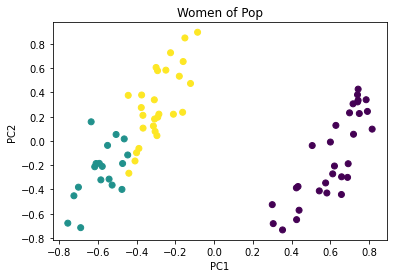

Group Women of R&B: [0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 0 0 1 0 1 1 0 0]


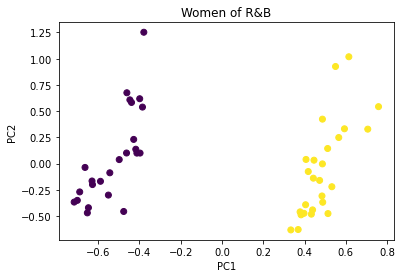

Group Women's Voice: [1 0 2 3 2 0 2 3 1 2 1 3 1 0 1 0 0 3 3 3 1 0 0 2 2 0 3 0 0 2 3 3 2 0 2 2 2
 3 2 1 2 2 3 1 2 3 3 2 2 2 2 2 3 1 3 3 0 1 2 3 3 2 2 0 0 2 0 3 2 2 2 1 2 3
 3 3 0 1 3 2 0 2 0 2 1 2 2 2 2 1 1 3 0 2 2 3 2 2 2 0]


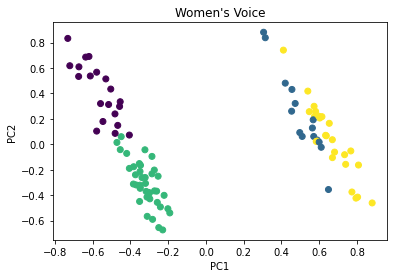

,playlist_name,playlist_followers,playlist_owner,track_name,track__popularity,track_release_date,artist_name,artist_popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,cluster_2
1768,Door Knockers,376093,Spotify,Let Me Blow Ya Mind,73,2001-01-01,Eve,69,0.908,0.557,...,0.1070,0.24200,0.00000,0.0709,0.897,90.032,230133,4,1,5
1769,Door Knockers,376093,Spotify,Shoop,70,1993-10-12,Salt-N-Pepa,62,0.939,0.674,...,0.2120,0.09100,0.00000,0.0565,0.792,96.918,248573,4,0,1
1770,Door Knockers,376093,Spotify,Moment 4 Life,68,2010-01-01,Nicki Minaj,87,0.475,0.882,...,0.3510,0.40600,0.00000,0.2410,0.369,98.001,279307,4,0,3
1771,Door Knockers,376093,Spotify,Work It,68,2002-11-12,Missy Elliott,72,0.884,0.677,...,0.2830,0.07780,0.00000,0.0732,0.584,101.868,263227,4,0,1
1772,Door Knockers,376093,Spotify,Shake Dat Sh**,27,2004-01-01,Shawnna,53,0.925,0.798,...,0.0717,0.73600,0.00000,0.1440,0.491,120.896,235333,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,Women's Voice,113955,Spotify,先輩,47,2023-08-30,乃紫,57,0.393,0.934,...,0.0987,0.00701,0.00000,0.3870,0.517,153.978,201710,4,3,2
1914,Women's Voice,113955,Spotify,Server Down,47,2024-06-19,紫 今,47,0.797,0.532,...,0.0970,0.17100,0.00000,0.0833,0.856,121.046,141633,4,2,4
1915,Women's Voice,113955,Spotify,Paradise,47,2023-03-03,NiziU,61,0.530,0.749,...,0.0688,0.21200,0.00000,0.1350,0.394,170.069,207160,4,2,1
1916,Women's Voice,113955,Spotify,僕らしさ,50,2024-10-09,『ユイカ』,58,0.644,0.863,...,0.0374,0.01770,0.00409,0.2690,0.695,124.950,248147,4,2,1


In [9]:
# Apply KMeans with optimal number of clusters
df = pd.DataFrame()

kmeans_dict = {}
kmeans_2_dict = {}
cluster_labels_dict = {}
cluster_labels_2_dict = {}

for group_name, group in groups:
    reduced_data = reduced_data_dict[group_name]

    k = optimal_num_k[group_name]
    k_2 = optimal_num_k_2[group_name]

    # Apply KMeans with optimal number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_data)
    kmeans_2 = KMeans(n_clusters=k_2, random_state=42).fit(reduced_data)
    
    kmeans_dict[group_name] = kmeans
    kmeans_2_dict[group_name] = kmeans_2

    cluster_labels_dict[group_name] = kmeans.labels_
    cluster_labels_2_dict[group_name] = kmeans_2.labels_

    print(f"Group {group_name}: {kmeans.labels_}")

    # Assign cluster labels to original group data
    group = group.assign(cluster=kmeans.labels_)
    group = group.assign(cluster_2=kmeans_2.labels_)

    # Append group to original dataframe
    df = pd.concat([df, group])
    
    # Plot clusters
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(group_name)
    plt.show()

display(df)


## Variables creation

### HH-Index

In [10]:
groups = df.groupby('playlist_name')


In [11]:
# Calculate the shares of each cluster
shares_perc = {}

for group_name, group in groups:
    shares = group['cluster'].value_counts(normalize=True)
    shares_perc[group_name] = shares * 100

# Calculate the HHI
hhi = {}
hhi_2 = {}

for group_name, group in groups:
  shares = group['cluster'].value_counts(normalize=True)
  hhi[group_name] = sum((shares*100)**2)

  shares_2 = group['cluster_2'].value_counts(normalize=True)
  hhi_2[group_name] = sum((shares_2*100)**2)

print(hhi)
print(hhi_2)

print("Minimum HHI: ", min(hhi.values()))
print("Mean HHI: ", np.mean(list(hhi.values())))
print("Median HHI: ", np.median(list(hhi.values())))
print("Maximum HHI: ", max(hhi.values()))
print("Standard deviation: ", np.std(list(hhi.values())))


{'Door Knockers': 5200.0, 'Dope AF': 3706.172839506173, 'EQUAL': 2856.0, 'EQUAL AU & NZ': 5968.0, 'EQUAL Africa': 3838.8888888888896, 'EQUAL Andes': 2190.0, 'EQUAL Brasil': 3656.9951163458777, 'EQUAL Canada': 3512.5, 'EQUAL España': 3628.267739155415, 'EQUAL France': 5032.0, 'EQUAL GSA': 3256.0, 'EQUAL Korea': 4368.0, 'EQUAL México': 5050.000000000001, 'EQUAL Portugal': 2576.0, 'EQUAL UK & Ireland ': 6101.624323198668, 'EQUAL US': 2303.2407407407404, "Feelin' Myself": 3912.0, 'Fierce Femmes': 2648.0, 'Inspiring Latinas': 5008.0, 'Melodys Marcantes': 3438.888888888889, 'Queen': 5023.781212841854, 'She Rocks': 2832.0, 'Women of Afro': 3934.375, 'Women of Country': 3694.6745562130186, 'Women of Folk': 7312.0, 'Women of K-Pop': 3754.8828125, 'Women of Latin': 3864.0, 'Women of Pop': 3472.0, 'Women of R&B': 5008.0, "Women's Voice": 2850.0}
{'Door Knockers': 1360.0, 'Dope AF': 1266.6666666666667, 'EQUAL': 1272.0, 'EQUAL AU & NZ': 2146.0, 'EQUAL Africa': 2050.0, 'EQUAL Andes': 1268.0, 'EQUAL 

### Euclidean distances

In [12]:
# Calculate distances between cluster centroids
distances_dict = {}
distances_dict_2 = {}

for group_name, group in groups:
    # Get the cluster centroids for the group
    cluster_centroids = kmeans_dict[group_name].cluster_centers_
    cluster_centroids_2 = kmeans_2_dict[group_name].cluster_centers_

    # Calculate pairwise euclidean distances between cluster centroids
    distances = pairwise_distances(cluster_centroids)
    distances_2 = pairwise_distances(cluster_centroids_2)

    # Calculate mean pairwise distance
    mean_distance = distances.mean()
    mean_distance_2 = distances_2.mean()

    # Print mean pairwise distance for the group
    print(f"Group {group_name}: Mean pairwise distance between cluster centroids = {mean_distance}")

    distances_dict[group_name] = mean_distance
    distances_dict_2[group_name] = mean_distance_2

# Calculate max, min, mean, median and standard deviation of distances
distances_list = [d for distances in distances_dict.values() for d in distances.flatten() if not np.isnan(d)]
print(f"Max distance: {np.max(distances_list):.5f}")
print(f"Min distance: {np.min(distances_list):.5f}")
print(f"Mean distance: {np.mean(distances_list):.5f}")
print(f"Median distance: {np.median(distances_list):.5f}")
print(f"Standard deviation of distances: {np.std(distances_list):.5f}")


Group Door Knockers: Mean pairwise distance between cluster centroids = 0.5417783758552661
Group Dope AF: Mean pairwise distance between cluster centroids = 0.6287693124979477
Group EQUAL: Mean pairwise distance between cluster centroids = 0.8162805033665238
Group EQUAL AU & NZ: Mean pairwise distance between cluster centroids = 0.5090088163400747
Group EQUAL Africa: Mean pairwise distance between cluster centroids = 0.7767632636786024
Group EQUAL Andes: Mean pairwise distance between cluster centroids = 0.8389886711200498
Group EQUAL Brasil: Mean pairwise distance between cluster centroids = 0.6353185256516504
Group EQUAL Canada: Mean pairwise distance between cluster centroids = 0.7114376033567285
Group EQUAL España: Mean pairwise distance between cluster centroids = 0.8516341185585872
Group EQUAL France: Mean pairwise distance between cluster centroids = 0.5056442093366439
Group EQUAL GSA: Mean pairwise distance between cluster centroids = 0.8848051721445007
Group EQUAL Korea: Mean 

In [13]:
# Calculate distances bewteen tracks
scaler = MinMaxScaler()

distances_dict_3 = {}

for group_name, group in groups:
    subset = group.loc[:, "danceability":"time_signature"]
    scaled_columns = scaler.fit_transform(subset)

    pairwise_dist = pairwise_distances(scaled_columns)
    mean_distance = pairwise_dist.mean()
    
    # Print mean pairwise distance for the group
    print(f"Group {group_name}: Mean pairwise distance between tracks = {mean_distance}")

    distances_dict_3[group_name] = mean_distance

# Calculate max, min, mean, median and standard deviation of distances
distances_list = [d for distances in distances_dict_3.values() for d in distances.flatten() if not np.isnan(d)]
print(f"Max distance: {np.max(distances_list):.5f}")
print(f"Min distance: {np.min(distances_list):.5f}")
print(f"Mean distance: {np.mean(distances_list):.5f}")
print(f"Median distance: {np.median(distances_list):.5f}")
print(f"Standard deviation of distances: {np.std(distances_list):.5f}")


Group Door Knockers: Mean pairwise distance between tracks = 1.2910800545248446
Group Dope AF: Mean pairwise distance between tracks = 1.2352825229811581
Group EQUAL: Mean pairwise distance between tracks = 1.2716434509666703
Group EQUAL AU & NZ: Mean pairwise distance between tracks = 1.1674142168639587
Group EQUAL Africa: Mean pairwise distance between tracks = 1.349429257499026
Group EQUAL Andes: Mean pairwise distance between tracks = 1.2510501533671932
Group EQUAL Brasil: Mean pairwise distance between tracks = 1.1989327745488467
Group EQUAL Canada: Mean pairwise distance between tracks = 1.3637672484731576
Group EQUAL España: Mean pairwise distance between tracks = 1.2747029376981673
Group EQUAL France: Mean pairwise distance between tracks = 1.3324458398463834
Group EQUAL GSA: Mean pairwise distance between tracks = 1.377724725661175
Group EQUAL Korea: Mean pairwise distance between tracks = 1.2771842480387647
Group EQUAL México: Mean pairwise distance between tracks = 1.4472127

### Stirling diversity index

In [14]:
# k-alpha Rao-Stirling index
stirling_index_dict = {}

for group_name, group in groups:
    clusters = group.groupby('cluster')

    total_index = 0

    cluster_centroids = kmeans_dict[group_name].cluster_centers_
    
    for i, (cluster_i_name, cluster_i) in enumerate(clusters):
        for j, (cluster_j_name, cluster_j) in enumerate(clusters):
            if i >= j:
                continue
            
            centroid_i = cluster_centroids[i]
            centroid_j = cluster_centroids[j]
            dist = cdist([centroid_i], [centroid_j], 'euclidean')

            share_i = len(cluster_i) / len(group)
            share_j = len(cluster_j) / len(group)

            index = dist * share_i * share_j

            total_index += index

    stirling_index_dict[group_name] = total_index

print(stirling_index_dict)

print("Minimum index: ", min(stirling_index_dict.values()))
print("Mean index: ", np.mean(list(stirling_index_dict.values())))
print("Median index: ", np.median(list(stirling_index_dict.values())))
print("Maximum index: ", max(stirling_index_dict.values()))
print("Standard deviation: ", np.std(list(stirling_index_dict.values())))


{'Door Knockers': array([[0.26005362]]), 'Dope AF': array([[0.3065403]]), 'EQUAL': array([[0.37964035]]), 'EQUAL AU & NZ': array([[0.20523235]]), 'EQUAL Africa': array([[0.34587494]]), 'EQUAL Andes': array([[0.40107143]]), 'EQUAL Brasil': array([[0.3196897]]), 'EQUAL Canada': array([[0.34581365]]), 'EQUAL España': array([[0.34614809]]), 'EQUAL France': array([[0.25120404]]), 'EQUAL GSA': array([[0.39376745]]), 'EQUAL Korea': array([[0.30899476]]), 'EQUAL México': array([[0.25394844]]), 'EQUAL Portugal': array([[0.37314058]]), 'EQUAL UK & Ireland ': array([[0.20186028]]), 'EQUAL US': array([[0.3903066]]), "Feelin' Myself": array([[0.34357123]]), 'Fierce Femmes': array([[0.3428296]]), 'Inspiring Latinas': array([[0.2534055]]), 'Melodys Marcantes': array([[0.32345941]]), 'Queen': array([[0.25285013]]), 'She Rocks': array([[0.33572993]]), 'Women of Afro': array([[0.30898532]]), 'Women of Country': array([[0.25219288]]), 'Women of Folk': array([[0.13536119]]), 'Women of K-Pop': array([[0.31

In [15]:
# k-beta Rao-Stirling index
stirling_index_2_dict = {}

for group_name, group in groups:
    clusters = group.groupby('cluster_2')

    total_index = 0

    cluster_centroids = kmeans_2_dict[group_name].cluster_centers_
    
    for i, (cluster_i_name, cluster_i) in enumerate(clusters):
        for j, (cluster_j_name, cluster_j) in enumerate(clusters):
            if i >= j:
                continue
            
            centroid_i = cluster_centroids[i]
            centroid_j = cluster_centroids[j]
            dist = cdist([centroid_i], [centroid_j], 'euclidean')

            share_i = len(cluster_i) / len(group)
            share_j = len(cluster_j) / len(group)

            index = dist * share_i * share_j

            total_index += index

    stirling_index_2_dict[group_name] = total_index

print(stirling_index_2_dict)

print("Minimum index: ", min(stirling_index_2_dict.values()))
print("Mean index: ", np.mean(list(stirling_index_2_dict.values())))
print("Median index: ", np.median(list(stirling_index_2_dict.values())))
print("Maximum index: ", max(stirling_index_2_dict.values()))
print("Standard deviation: ", np.std(list(stirling_index_2_dict.values())))


{'Door Knockers': array([[0.48370716]]), 'Dope AF': array([[0.44831873]]), 'EQUAL': array([[0.47303345]]), 'EQUAL AU & NZ': array([[0.37091924]]), 'EQUAL Africa': array([[0.46241149]]), 'EQUAL Andes': array([[0.46732473]]), 'EQUAL Brasil': array([[0.44209485]]), 'EQUAL Canada': array([[0.47891781]]), 'EQUAL España': array([[0.42340853]]), 'EQUAL France': array([[0.49469066]]), 'EQUAL GSA': array([[0.48699025]]), 'EQUAL Korea': array([[0.45083485]]), 'EQUAL México': array([[0.53103469]]), 'EQUAL Portugal': array([[0.46487472]]), 'EQUAL UK & Ireland ': array([[0.48382648]]), 'EQUAL US': array([[0.3903066]]), "Feelin' Myself": array([[0.49203156]]), 'Fierce Femmes': array([[0.42571927]]), 'Inspiring Latinas': array([[0.46792572]]), 'Melodys Marcantes': array([[0.48164371]]), 'Queen': array([[0.45659339]]), 'She Rocks': array([[0.43352474]]), 'Women of Afro': array([[0.46456458]]), 'Women of Country': array([[0.38118674]]), 'Women of Folk': array([[0.3943571]]), 'Women of K-Pop': array([[0

## Append to dataframe

In [16]:
# Append playlist-level indicators
panel_data = []

for group_name, group in groups:
    # Retrieve playlist-level indicators
    # Variety
    nb_clusters = optimal_num_k[group_name]
    nb_clusters_2 = optimal_num_k_2[group_name]

    # Balance
    hh_index = hhi[group_name]
    hh_index_2 = hhi_2[group_name]

    # Distparity
    distances = distances_dict[group_name]
    distances_2 = distances_dict_2[group_name]
    distances_3 = distances_dict_3[group_name]

    # Diversity
    stirling_index = stirling_index_dict[group_name]
    stirling_index_2 = stirling_index_2_dict[group_name]
    
    # Add playlist-level indicators to each track in the playlist
    for _, track in group.iterrows():
        track_data = track.to_dict()
        track_data.update({
            'nb_clusters': nb_clusters,
            'nb_clusters_2': nb_clusters_2,
            'hh_index': hh_index,
            'hh_index_2': hh_index_2,
            'distances': distances,
            'distances_2': distances_2,
            'distances_3': distances_3,
            'stirling_index': stirling_index,
            'stirling_index_2': stirling_index_2
        })
        panel_data.append(track_data)

# Convert to DataFrame
panel_data_df = pd.DataFrame(panel_data)
display(panel_data_df)


,playlist_name,playlist_followers,playlist_owner,track_name,track__popularity,track_release_date,artist_name,artist_popularity,danceability,energy,...,cluster_2,nb_clusters,nb_clusters_2,hh_index,hh_index_2,distances,distances_2,distances_3,stirling_index,stirling_index_2
0,Door Knockers,376093,Spotify,Let Me Blow Ya Mind,73,2001-01-01,Eve,69,0.908,0.557,...,5,2,10,5200.0,1360.0,0.541778,1.075019,1.291080,[[0.2600536204105277]],[[0.48370715766373695]]
1,Door Knockers,376093,Spotify,Shoop,70,1993-10-12,Salt-N-Pepa,62,0.939,0.674,...,1,2,10,5200.0,1360.0,0.541778,1.075019,1.291080,[[0.2600536204105277]],[[0.48370715766373695]]
2,Door Knockers,376093,Spotify,Moment 4 Life,68,2010-01-01,Nicki Minaj,87,0.475,0.882,...,3,2,10,5200.0,1360.0,0.541778,1.075019,1.291080,[[0.2600536204105277]],[[0.48370715766373695]]
3,Door Knockers,376093,Spotify,Work It,68,2002-11-12,Missy Elliott,72,0.884,0.677,...,1,2,10,5200.0,1360.0,0.541778,1.075019,1.291080,[[0.2600536204105277]],[[0.48370715766373695]]
4,Door Knockers,376093,Spotify,Shake Dat Sh**,27,2004-01-01,Shawnna,53,0.925,0.798,...,4,2,10,5200.0,1360.0,0.541778,1.075019,1.291080,[[0.2600536204105277]],[[0.48370715766373695]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Women's Voice,113955,Spotify,先輩,47,2023-08-30,乃紫,57,0.393,0.934,...,2,4,6,2850.0,1830.0,0.756767,0.878338,1.223371,[[0.3571404559665629]],[[0.4106107657039121]]
2107,Women's Voice,113955,Spotify,Server Down,47,2024-06-19,紫 今,47,0.797,0.532,...,4,4,6,2850.0,1830.0,0.756767,0.878338,1.223371,[[0.3571404559665629]],[[0.4106107657039121]]
2108,Women's Voice,113955,Spotify,Paradise,47,2023-03-03,NiziU,61,0.530,0.749,...,1,4,6,2850.0,1830.0,0.756767,0.878338,1.223371,[[0.3571404559665629]],[[0.4106107657039121]]
2109,Women's Voice,113955,Spotify,僕らしさ,50,2024-10-09,『ユイカ』,58,0.644,0.863,...,1,4,6,2850.0,1830.0,0.756767,0.878338,1.223371,[[0.3571404559665629]],[[0.4106107657039121]]


In [17]:
# Export to Excel
panel_data_df.to_excel("df_equal_final.xlsx", index=False)
